<a href="https://colab.research.google.com/github/vishnuanil1177/multi_model_sentiment-analysis/blob/main/Copy_of_Multi_CNN_Image_Sentiment_Classification_(E_MOGRAM_Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers


In [ ]:
import requests
import cv2
import numpy as np
from PIL import Image
from io import BytesIO
from transformers import pipeline

# Facebook API Access Token & Page ID
access_token = 'EAB0b1ljCfFkBO0LM8b1AwcuDp8TPOeLUJ4uejuH0Y6E4MuTmVPqOnZAAJTOzmeHIiHQx9HGiUPTdFAGElCRnVTAQPMxPKv3Sv5OJUgVpWi4i7jtK8nNKh14h1qPTySYyG5YQa10NHQHqxH8JuZBlowHr6pZAyBIwBJMrhUYQN2mfwZCbaUP1BJJ4Q0x3ttiq7AalWPIIUDFG0el1PChUQhw5YM6aasGI4zn30J3FtKf9yLan8ZBZBYQEawco658gZDZD'
page_id = '122124025904354239'

# Load Emotion Detection Model
emotion_detector = pipeline('text-classification', model='j-hartmann/emotion-english-distilroberta-base')

# Function to Convert Color Images to Black & White
def convert_rgb_to_bw(image_url):
    response = requests.get(image_url)
    if response.status_code == 200:
        img = Image.open(BytesIO(response.content))
        bw_image = img.convert('L')  # Convert to grayscale (black & white)
        return np.array(bw_image)  # Convert to NumPy array for processing
    else:
        return None

# Function to Fetch Facebook Posts with Images
def fetch_facebook_posts(access_token, page_id):
    url = f"https://graph.facebook.com/v18.0/{page_id}/posts?fields=id,message,attachments{{media}}&access_token={access_token}"
    response = requests.get(url)
    return response.json() if response.status_code == 200 else None

# Function to Analyze Emotions in Text
def analyze_emotions(messages):
    return [emotion_detector(message) for message in messages]

# Fetch Posts
data = fetch_facebook_posts(access_token, page_id)

if data and "data" in data:
    for post in data["data"]:
        post_id = post.get("id")
        message = post.get("message", "No message")
        attachments = post.get("attachments", {})

        # Extract Image URL (if available)
        image_url = None
        if "data" in attachments:
            for attachment in attachments["data"]:
                if "media" in attachment and "image" in attachment["media"]:
                    image_url = attachment["media"]["image"]["src"]
                    break

        # Process Image (Convert to B&W)
        if image_url:
            print(f"Image URL for Post ID {post_id}: {image_url}")
            bw_image = convert_rgb_to_bw(image_url)
            if bw_image is not None:
                print("✅ Converted image to Black & White successfully!")
            else:
                print("❌ Error in converting image.")
        else:
            print(f"No image found for Post ID {post_id}")

        # Perform Emotion Analysis on Text
        emotions = analyze_emotions([message])
        print(f"🔹 Detected Emotion: {emotions[0]}")
        print("-" * 50)
else:
    print("⚠ No posts found or API error.")



Device set to use cuda:0


Image URL for Post ID 122124025904354239_122176291022354239: https://scontent-sin11-1.xx.fbcdn.net/v/t39.30808-6/490295855_122176290992354239_1751010297257800105_n.jpg?_nc_cat=104&ccb=1-7&_nc_sid=127cfc&_nc_ohc=qyw6ZL9S-bgQ7kNvwG2mflt&_nc_oc=AdlYfxyYM9t9vreSdi6ePgTngq8poTrZMe5I3Q985oqePHimak06wxfqM-FgeFFByIE&_nc_zt=23&_nc_ht=scontent-sin11-1.xx&edm=ACwmWnUEAAAA&_nc_gid=uKnsJKEIGn8buw-tp-z75w&oh=00_AfFq85AggTifuSAm_3XTyg41G6J3MHTSPtVJE9V49MT2PQ&oe=67FFD2F5
✅ Converted image to Black & White successfully!
🔹 Detected Emotion: [{'label': 'neutral', 'score': 0.622818648815155}]
--------------------------------------------------
No image found for Post ID 122124025904354239_122165391266354239
🔹 Detected Emotion: [{'label': 'joy', 'score': 0.9925234913825989}]
--------------------------------------------------
Image URL for Post ID 122124025904354239_122165391050354239: https://scontent-sin2-1.xx.fbcdn.net/v/t39.30808-6/481190681_122165390978354239_4877337272573018754_n.jpg?_nc_cat=100&ccb=1-

In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Set the path to your dataset file
dataset_path = '/content/drive/MyDrive/dym6p2pvbt-1/emo-at-cap.csv'

# Read the dataset
df = pd.read_csv(dataset_path)

# Print the dataset
print(df.head())  # Display the first few rows of the dataset


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                                  image_name  \
0    nm1055413_rm704041984_1977-4-2_2014.jpg   
1  nm0000113_rm1310297088_1964-7-26_2006.jpg   
2    nm0001713_rm271353088_1970-6-4_1995.jpg   
3    nm4237013_rm663142144_1985-0-0_2003.jpg   
4  nm0000113_rm1350277376_1964-7-26_2007.jpg   

                                          annotation human_sentiment sentiment  
0                  The man is running from something         Neutral   Neutral  
1  The worried woman is carrying for the other woman        Positive  Negative  
2  The man and the woman are trying to protect th...        Positive  Positive  
3                 The man is flirting with the woman        Positive  Positive  
4   The man and the woman are surprised by something        Positive  Positive  


In [ ]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical



In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/dym6p2pvbt-1/emo-at-cap.csv')

# Check the first few rows of the dataset to confirm it's loaded correctly
df.head()


,image_name,annotation,human_sentiment,sentiment
0,nm1055413_rm704041984_1977-4-2_2014.jpg,The man is running from something,Neutral,Neutral
1,nm0000113_rm1310297088_1964-7-26_2006.jpg,The worried woman is carrying for the other woman,Positive,Negative
2,nm0001713_rm271353088_1970-6-4_1995.jpg,The man and the woman are trying to protect th...,Positive,Positive
3,nm4237013_rm663142144_1985-0-0_2003.jpg,The man is flirting with the woman,Positive,Positive
4,nm0000113_rm1350277376_1964-7-26_2007.jpg,The man and the woman are surprised by something,Positive,Positive


In [ ]:
# Remove unnecessary columns: annotation and human_sentiment
df = df.drop(columns=['annotation', 'human_sentiment'])

# Print the DataFrame to confirm the removal
print(df.head())


                                  image_name sentiment
0    nm1055413_rm704041984_1977-4-2_2014.jpg   Neutral
1  nm0000113_rm1310297088_1964-7-26_2006.jpg  Negative
2    nm0001713_rm271353088_1970-6-4_1995.jpg  Positive
3    nm4237013_rm663142144_1985-0-0_2003.jpg  Positive
4  nm0000113_rm1350277376_1964-7-26_2007.jpg  Positive


In [ ]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the sentiment labels as integers
df['sentiment_encoded'] = label_encoder.fit_transform(df['sentiment'])

# Check the mapping of sentiment to numeric values
print(label_encoder.classes_)


['Negative' 'Neutral' 'Positive']


In [ ]:

# Set image size to 64x64
IMG_SIZE = 64

# Path to the images folder
image_folder_path = "/content/drive/MyDrive/dym6p2pvbt-1/images/"

# Lists to store images and labels
X = []
y = []

# Loop through the DataFrame and process each image
for idx, row in tqdm(df.iterrows(), total=len(df)):
    img_path = image_folder_path + row['image_name']

    # Read the image using OpenCV
    img = cv2.imread(img_path)

    if img is not None:
        # Resize to 128x128
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        X.append(img)
        y.append(row['sentiment_encoded'])
    else:
        print(f"⚠️ Skipped: {img_path}")

# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)

print("✅ Image resizing complete!")
print(f"Total images loaded: {len(X)}")
print(f"Shape of X (images): {X.shape}")
print(f"Shape of y (labels): {y.shape}")

100%|██████████| 3840/3840 [00:19<00:00, 197.32it/s]

✅ Image resizing complete!
Total images loaded: 3840
Shape of X (images): (3840, 64, 64, 3)
Shape of y (labels): (3840,)


In [ ]:
# Normalize the image data (convert pixel values to [0, 1] range)
X = X / 255.0


In [ ]:
# Save the processed images and labels to .npz files
np.savez('/content/drive/MyDrive/dym6p2pvbt-1/processed_data.npz', X=X, y=y)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# Confirm the shapes of the split datasets
print(f"Training data shape: {X_train.shape}, {y_train.shape}")
print(f"Validation data shape: {X_val.shape}, {y_val.shape}")


Training data shape: (3072, 64, 64, 3), (3072,)
Validation data shape: (768, 64, 64, 3), (768,)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Initialize the CNN model
model = models.Sequential()

# 1st Convolutional Layer + MaxPooling
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))  # 32 filters, kernel size (3,3)
model.add(layers.MaxPooling2D((2, 2)))  # Pooling size (2,2)

# 2nd Convolutional Layer + MaxPooling
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# 3rd Convolutional Layer + MaxPooling
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the data before passing to Dense layer
model.add(layers.Flatten())

# Fully Connected Layer
model.add(layers.Dense(128, activation='relu'))

# Output Layer
model.add(layers.Dense(3, activation='softmax'))  # 3 output classes (Negative, Neutral, Positive)

# Summary of the model
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_51 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_51 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_52 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_53 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,587 (2.61 MB)

 Trainable params: 683,587 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Fit the model with class weights
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), class_weight=class_weight_dict)


Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.3676 - loss: 1.1026 - val_accuracy: 0.5156 - val_loss: 1.0981
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3932 - loss: 1.1185 - val_accuracy: 0.5169 - val_loss: 1.0922
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3961 - loss: 1.1162 - val_accuracy: 0.4857 - val_loss: 1.0987
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3971 - loss: 1.0707 - val_accuracy: 0.0664 - val_loss: 1.1050
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1867 - loss: 1.1188 - val_accuracy: 0.4167 - val_loss: 1.0943
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2214 - loss: 1.1385 - val_accuracy: 0.2826 - val_loss: 1.1023
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3482 - loss: 1.0980 - val_accuracy: 0.2982 - val_loss: 1.0953
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3718 - loss: 1.0739 - val_accuracy: 0.4727 - val_loss

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


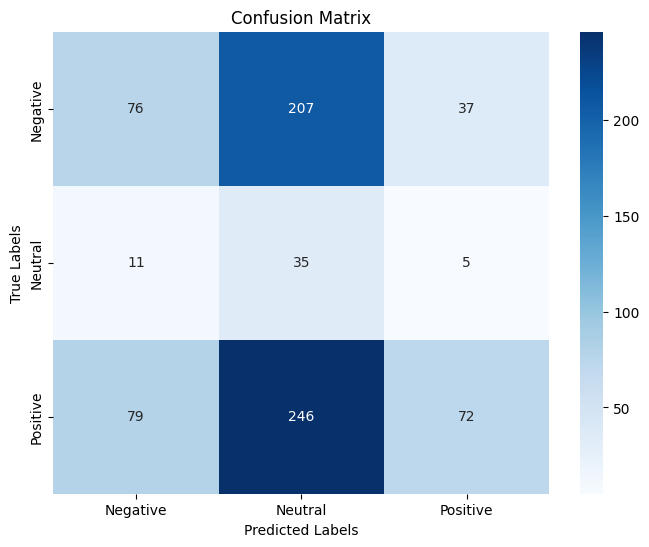

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
